In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from Model import OvA,OvO
from LogisticRegression import LogisticRegression
from SoftmaxRegression import SoftmaxRegression

## importing dataset


In [2]:
def load_dataset(file_name="data.txt"):
    col_name = []
    for i in range(7):
        col_name.append("feature" + str(i) )
    col_name.append("label")
    dataset = pd.read_csv(file_name, sep='\t', header=None, names=col_name)
    return dataset

#### 1.

In [3]:
data = load_dataset()
data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,label
0,12.10,12.20,0.8000,5.001,2.020,6.158,4.200,1
1,11.90,12.10,0.7800,5.001,2.100,6.210,4.150,1
2,22.00,16.10,0.9500,7.100,4.500,1.100,6.500,1
3,14.00,13.50,0.8711,6.100,3.500,3.000,5.218,1
4,18.05,14.50,0.9200,6.223,3.850,2.050,5.805,1
...,...,...,...,...,...,...,...,...
227,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
228,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
229,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
230,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


#### 2.

In [4]:
sample_num = data.shape[0]
sample_num

232

In [5]:
class_num = len(data['label'].unique())
class_num

3

#### dataset has 6 feature , 232 samples and 3 class

In [6]:
col_name = []
for i in range(7):
    col_name.append("feature" + str(i) )
col_name.append("label")
dataset = pd.read_csv("data.txt", sep='\t', header=None, names=col_name)
label_encoder = LabelEncoder()
labels = pd.Series(label_encoder.fit_transform(data['label']))
class_label = pd.Series(labels.unique())
data['label'] = labels

##### this code snippet is for loading a dataset with specific column names, encoding its categorical labels into numerical format using Label Encoding, and updating the dataset with these encoded labels.

In [7]:
class_label = pd.Series(labels.unique())
data['label'] = labels

#### 3.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


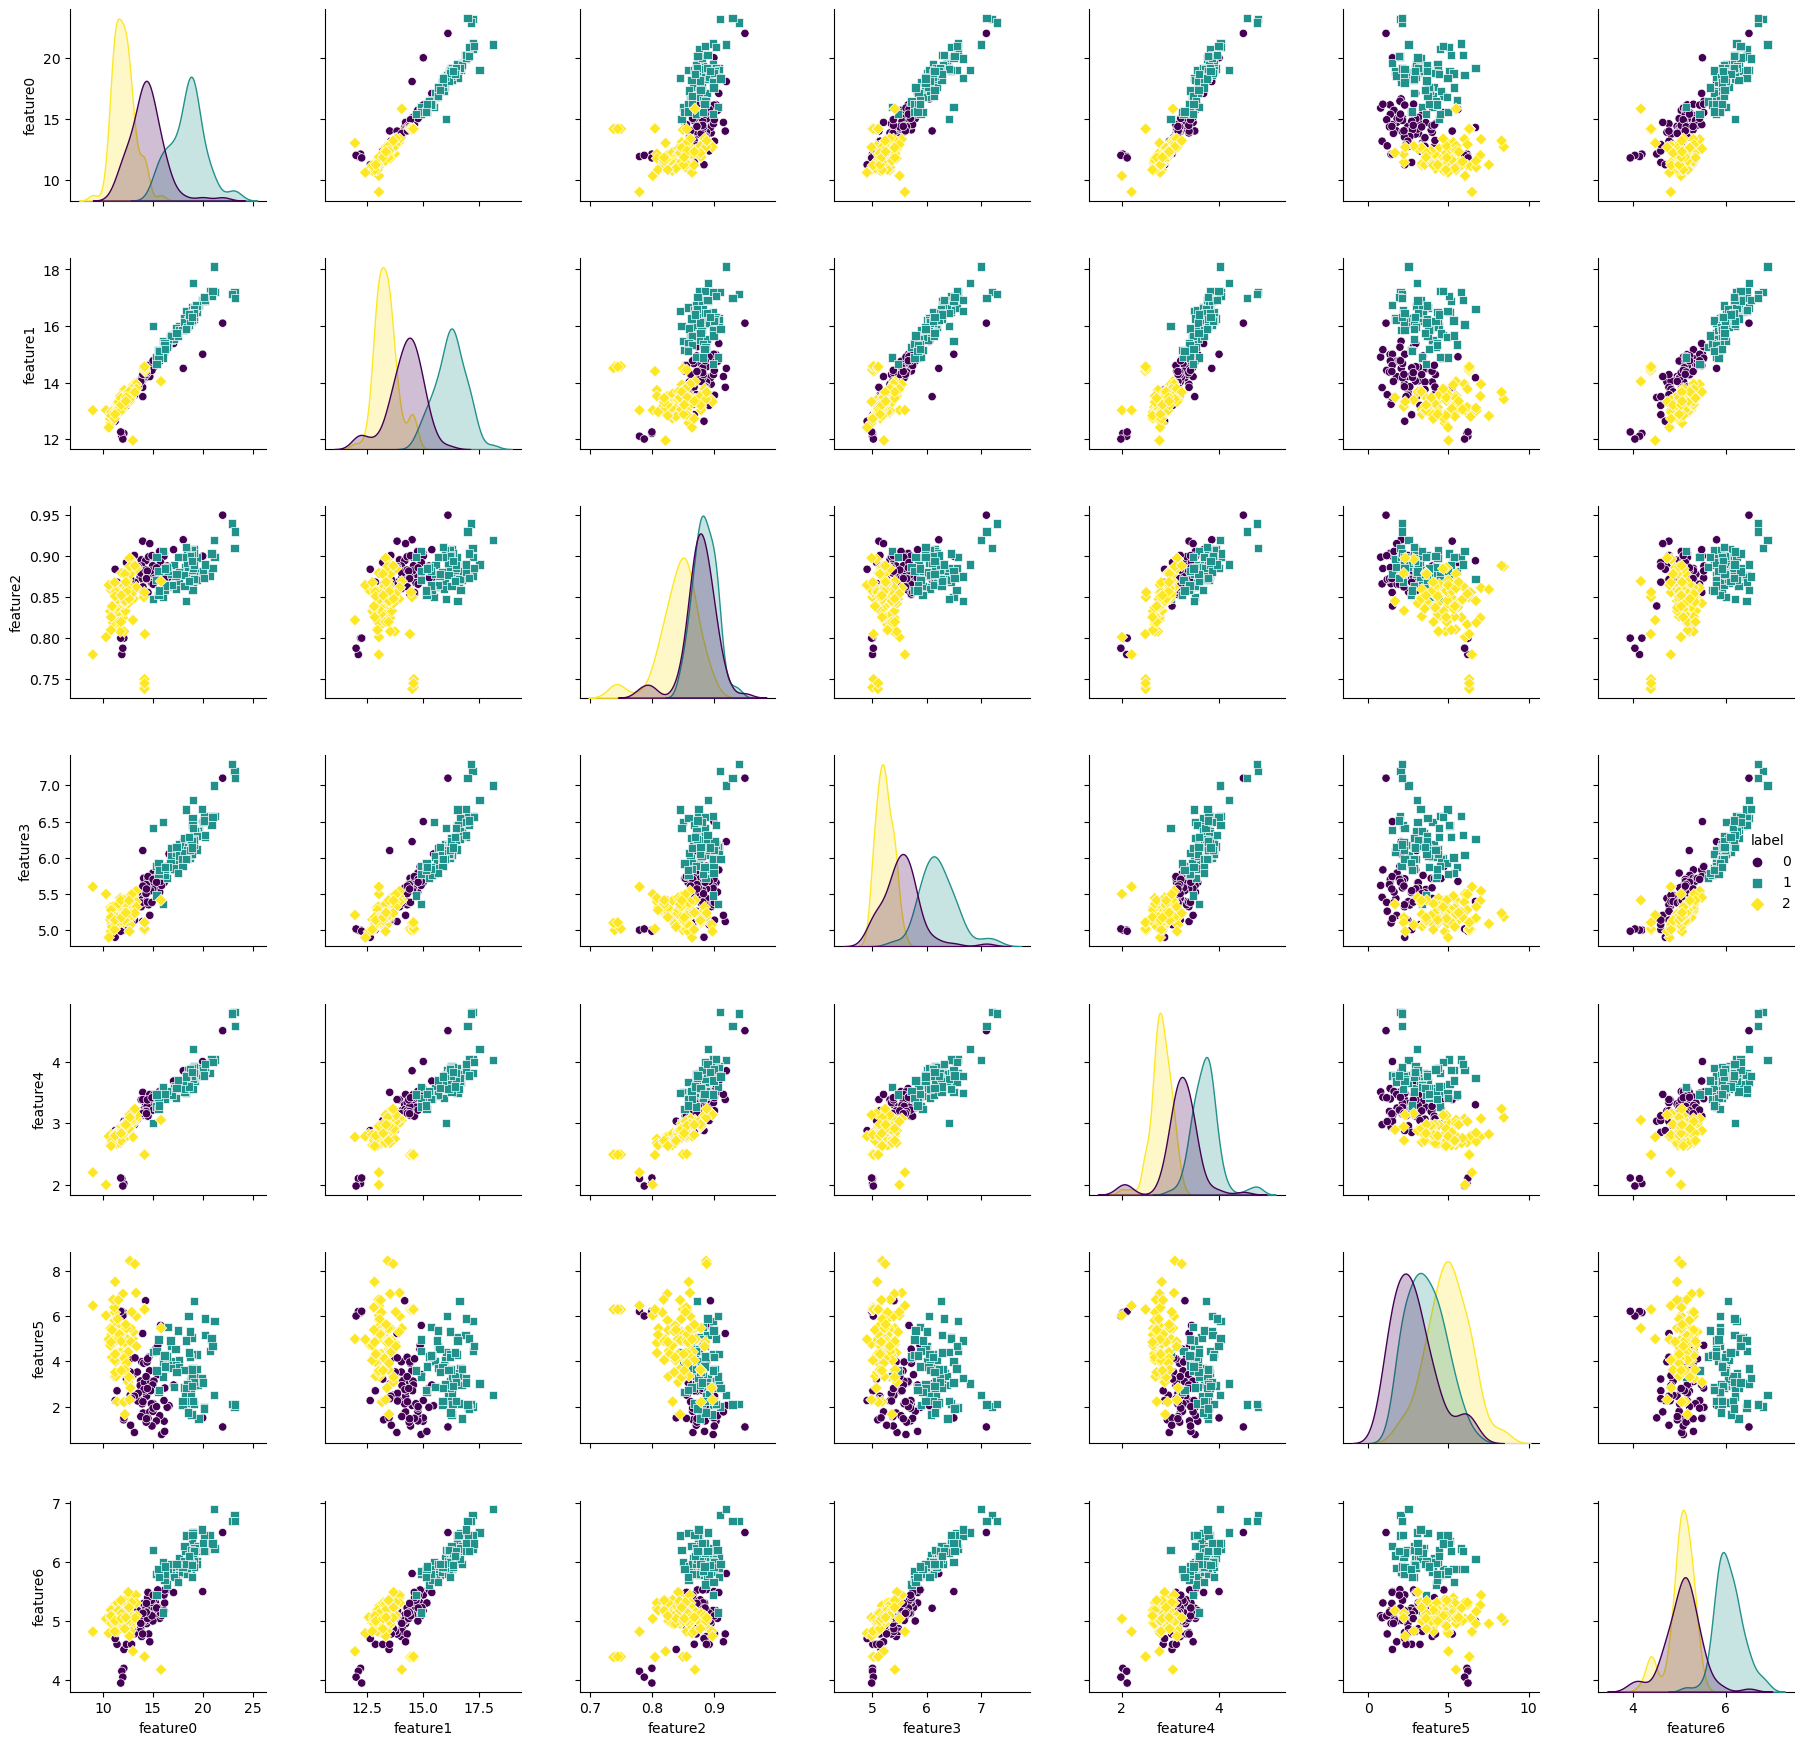

In [8]:
pair_plot = sns.pairplot(data, hue='label', palette='viridis', markers=["o", "s", "D"])
pair_plot.fig.subplots_adjust(top=1, right=1, hspace=0.3, wspace=0.3)
plt.show()

#### 4. Z-Score
Z-score assumes a normal distribution, and it's not applicable to categorical data. 

$$Z = \frac{X - \mu}{\sigma}$$lation.

#### Z is the Z-score,

#### X is the value of the element,

#### μ is the mean of the population, and

#### σ is the standard deviation of the population.

Lowering the Threshold (e.g., from 3 to 2):

Increases Sensitivity: More data points will be classified as outliers because now points that are closer to the mean (i.e., less extreme) than before will also be flagged as outliers.
More Outliers Detected: This can lead to a higher number of outliers being detected, potentially including some points that are not truly anomalous but are just moderately different from the norm.
Risk of Overfitting: In a machine learning context, this might lead to overfitting, especially if these "outliers" are actually normal variations in your data.

Raising the Threshold (e.g., from 3 to 4):

Decreases Sensitivity: Fewer data points will be classified as outliers. Only the most extreme points, those that are even further from the mean, will be flagged.
Fewer Outliers Detected: This can help in focusing only on the most significant anomalies in your data and ignoring less extreme variations.
Risk of Missing Outliers: On the downside, this might lead to missing some outliers that could be important, especially in cases where those moderate outliers have significance in your analysis or modeling.

In [9]:
def detect_outliers(dataset, threshold):
    z_scores = dataset.apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))
    is_outlier = (z_scores > threshold).any(axis=1)
    dataset['is_outlier'] = is_outlier
    pair_plot = sns.pairplot(dataset.drop(columns='label'), hue='is_outlier', palette={True: 'red', False: 'blue'}, markers=["o", "s"])
    pair_plot.fig.subplots_adjust(top=0.9, right=0.9, hspace=0.3, wspace=0.3)
    plt.show()
    
    outlier_counts = pd.DataFrame(index=np.unique(dataset['label']), columns=['Outlier Count'])

    for class_label in outlier_counts.index:
        class_outliers = dataset.loc[(dataset['label'] == class_label) & dataset['is_outlier']]
        outlier_counts.loc[class_label, 'Outlier Count'] = len(class_outliers)
    print("Outlier Counts for Each Class threshold is :",threshold)
    print(outlier_counts)
    dataset.drop(columns='is_outlier', inplace=True)
    return is_outlier

### threshold equal to 2.75

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


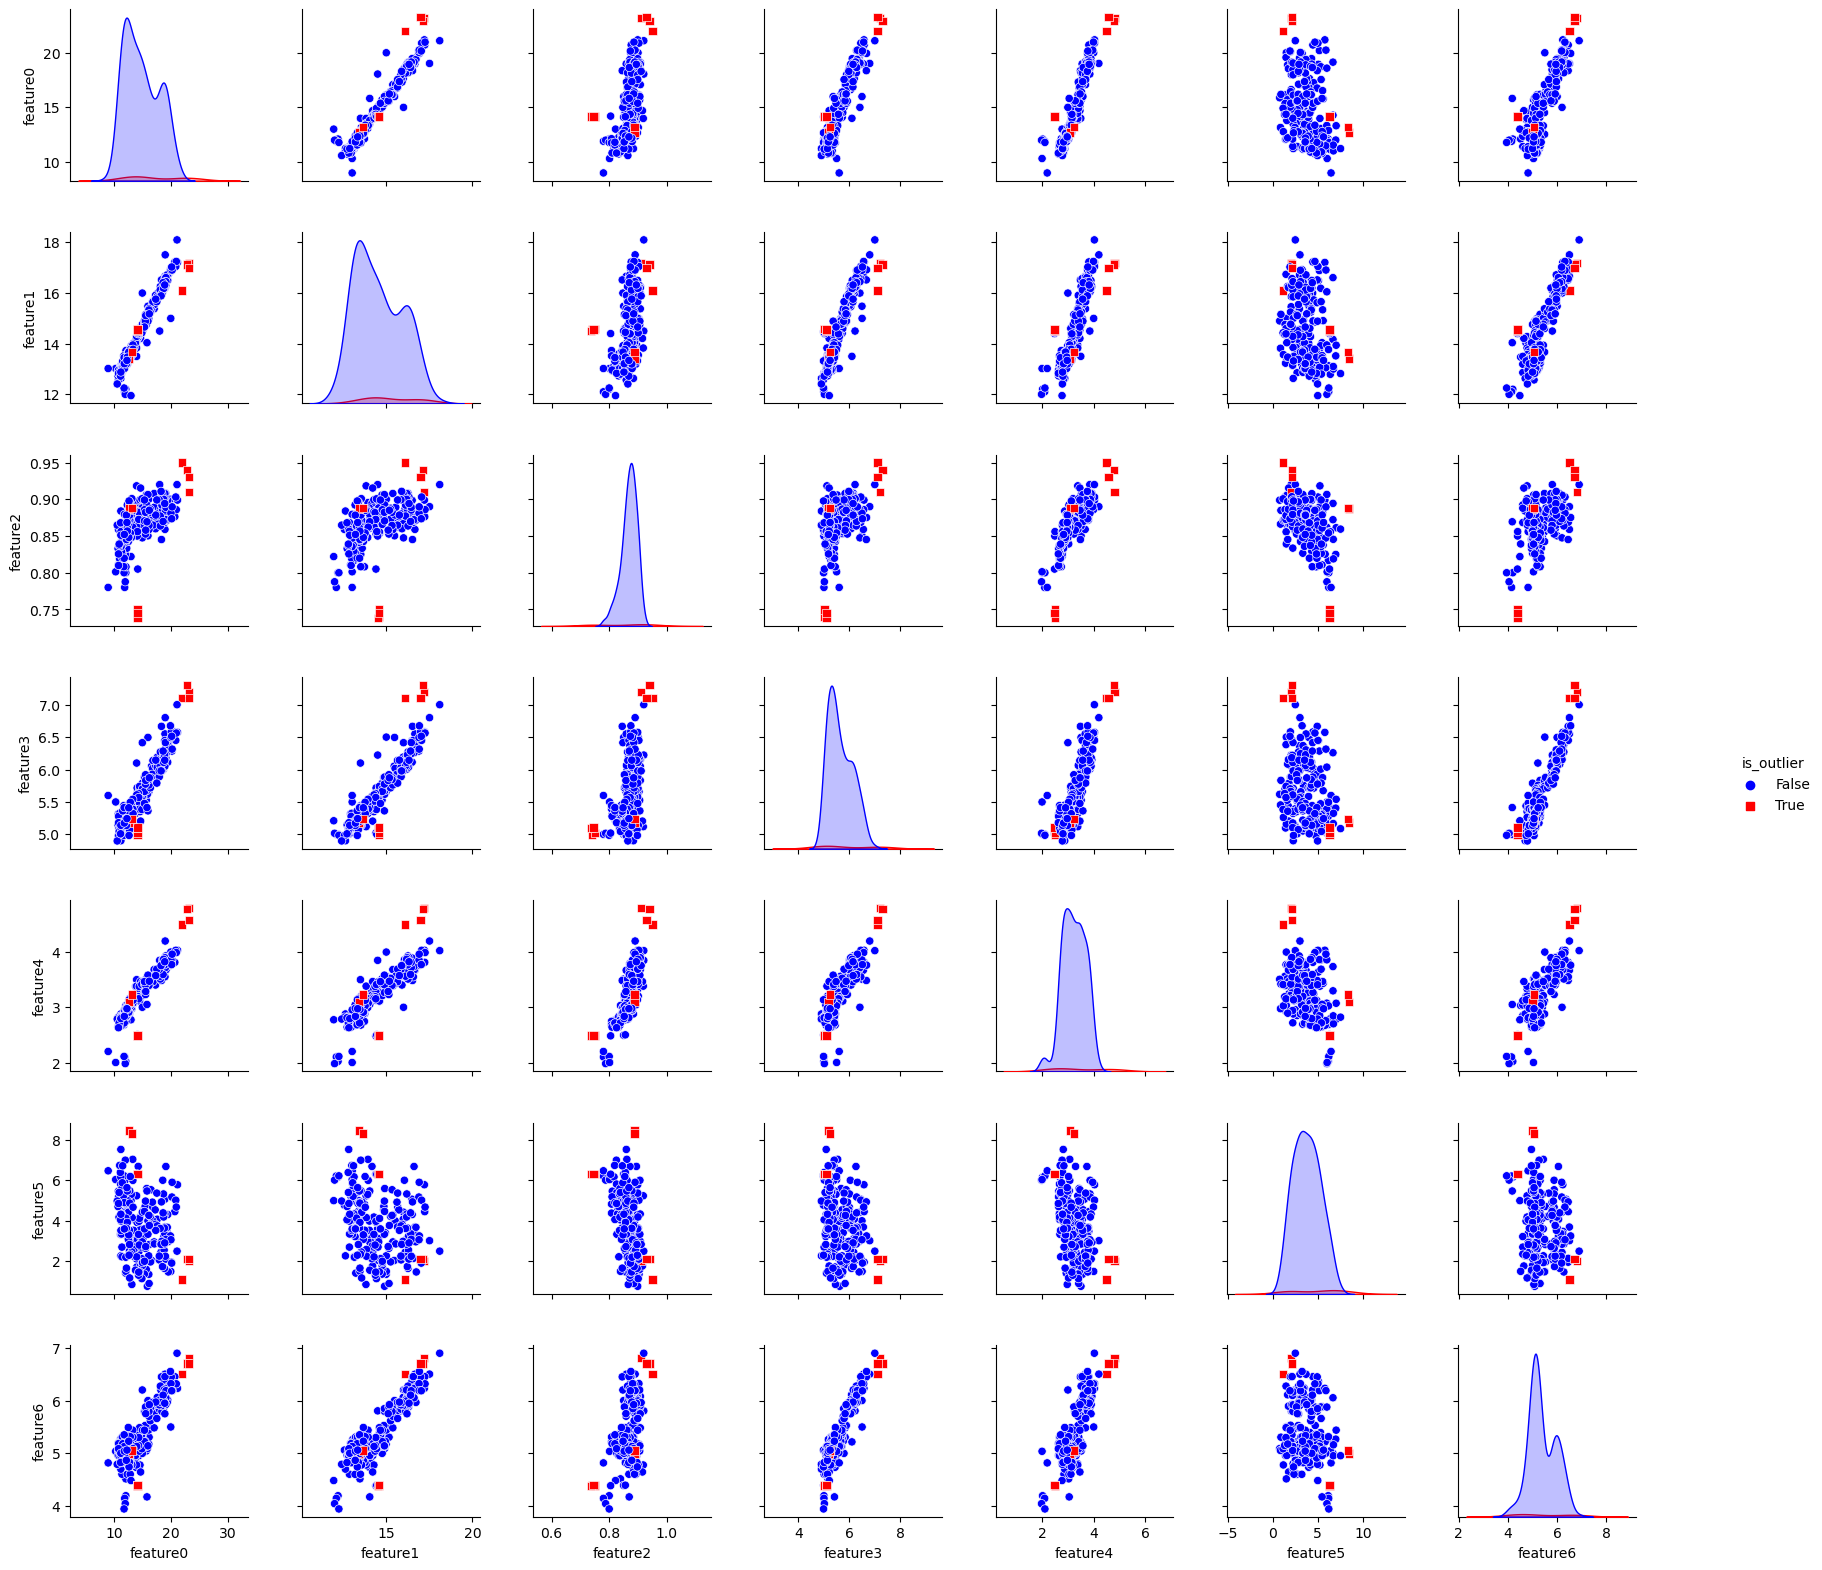

Outlier Counts for Each Class threshold is : 2.75
  Outlier Count
0             1
1             3
2             6


In [10]:
outliers = detect_outliers(data, 2.75)

### threshold equal to 3

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


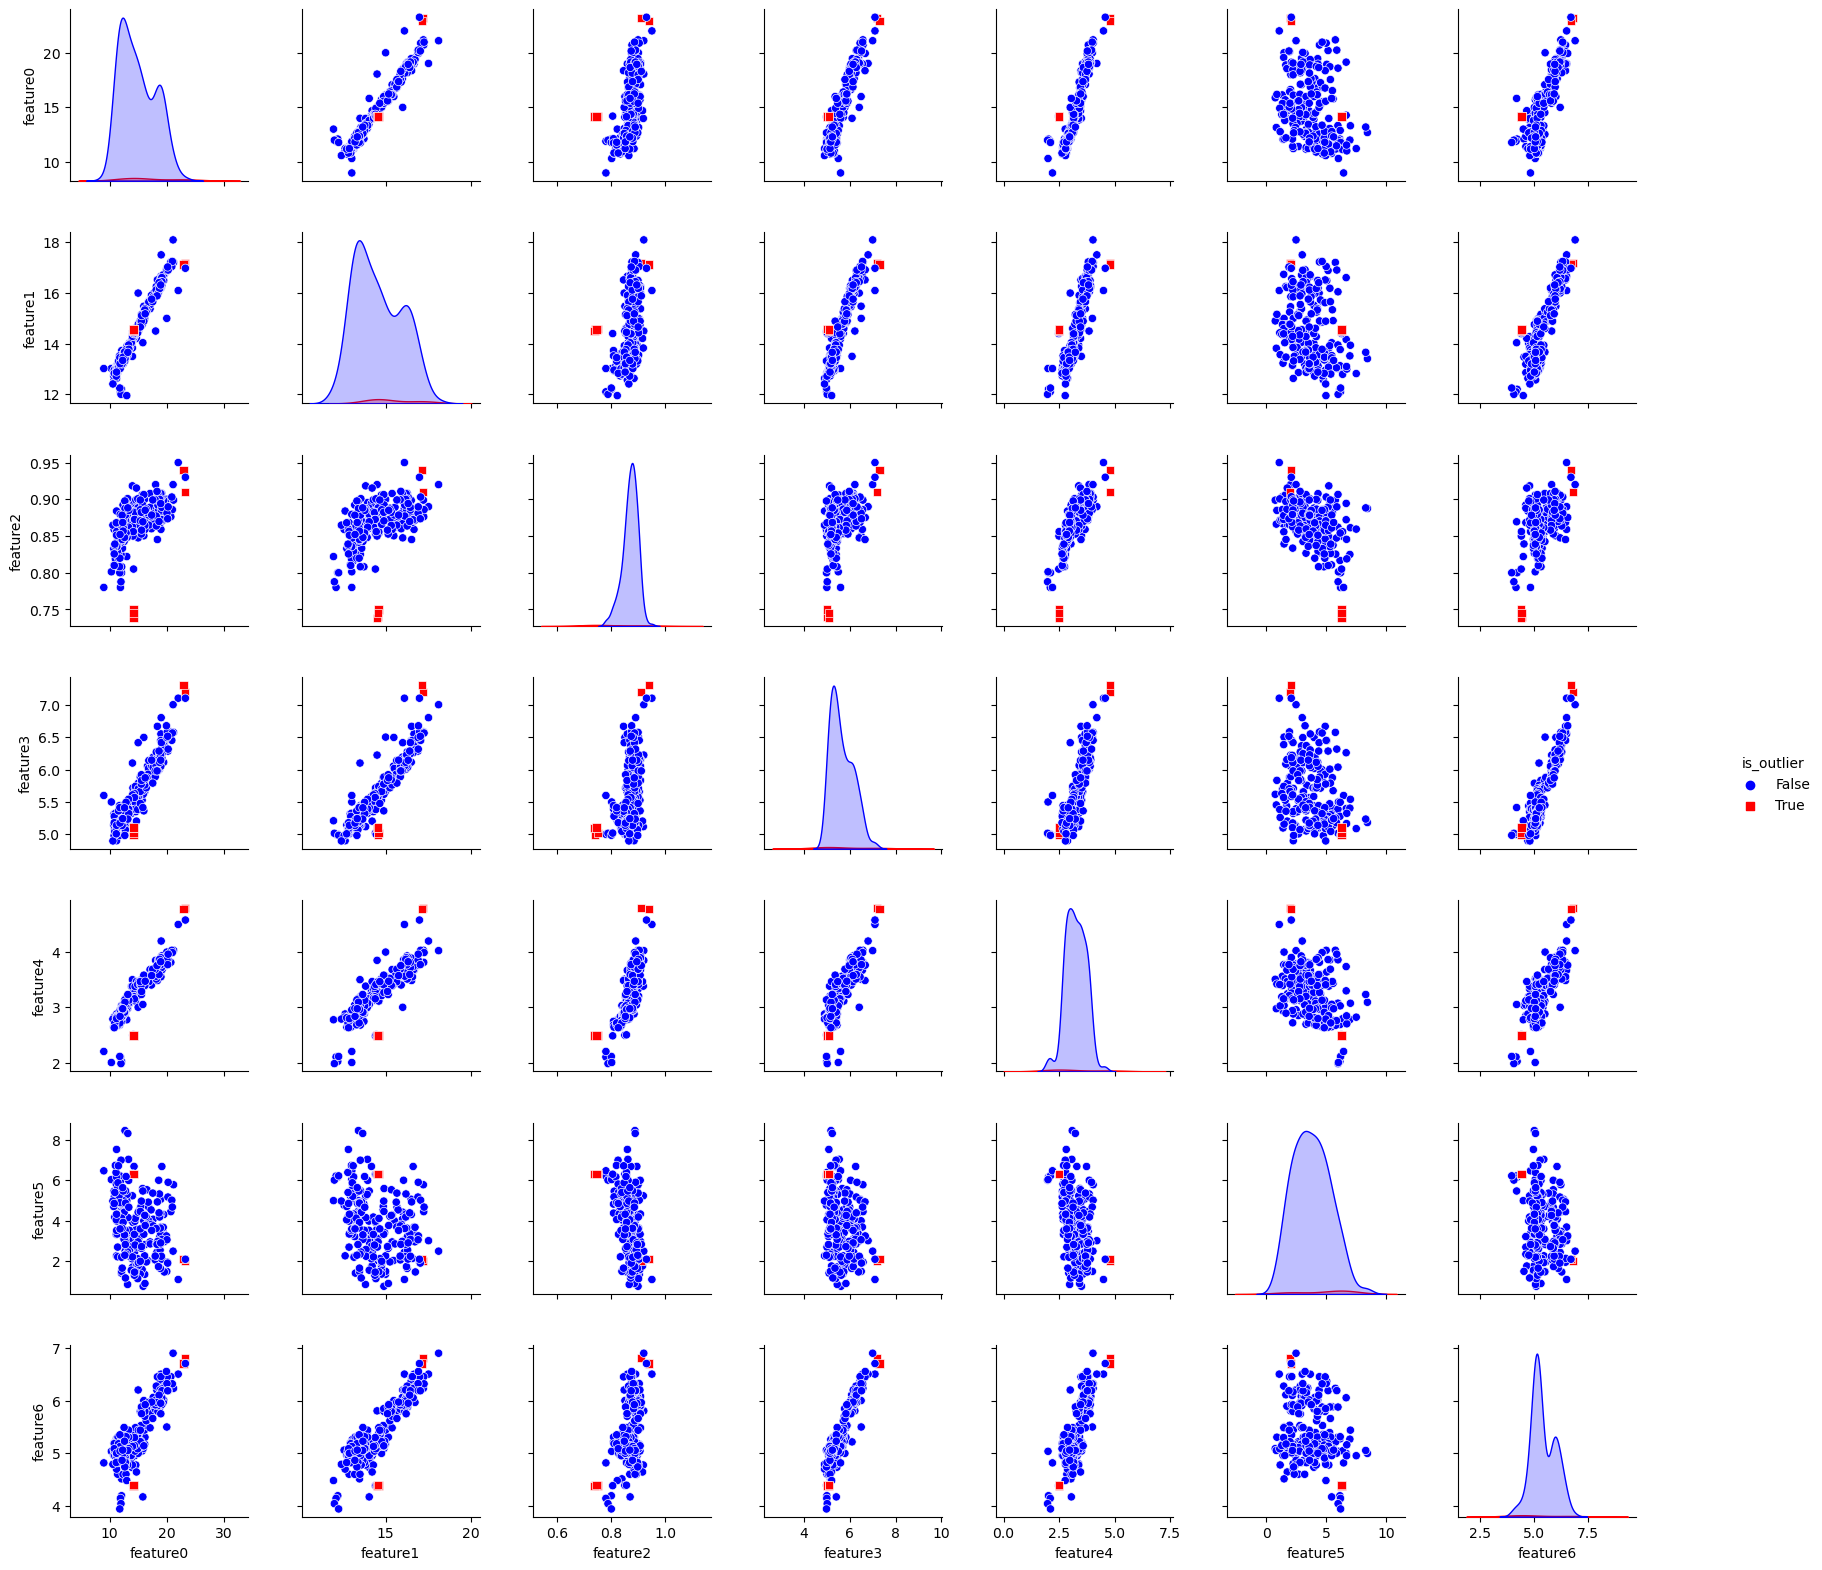

Outlier Counts for Each Class threshold is : 3
  Outlier Count
0             0
1             2
2             4


In [11]:
outlier_2 = detect_outliers(data, 3)

### threshold equal to 2.5

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


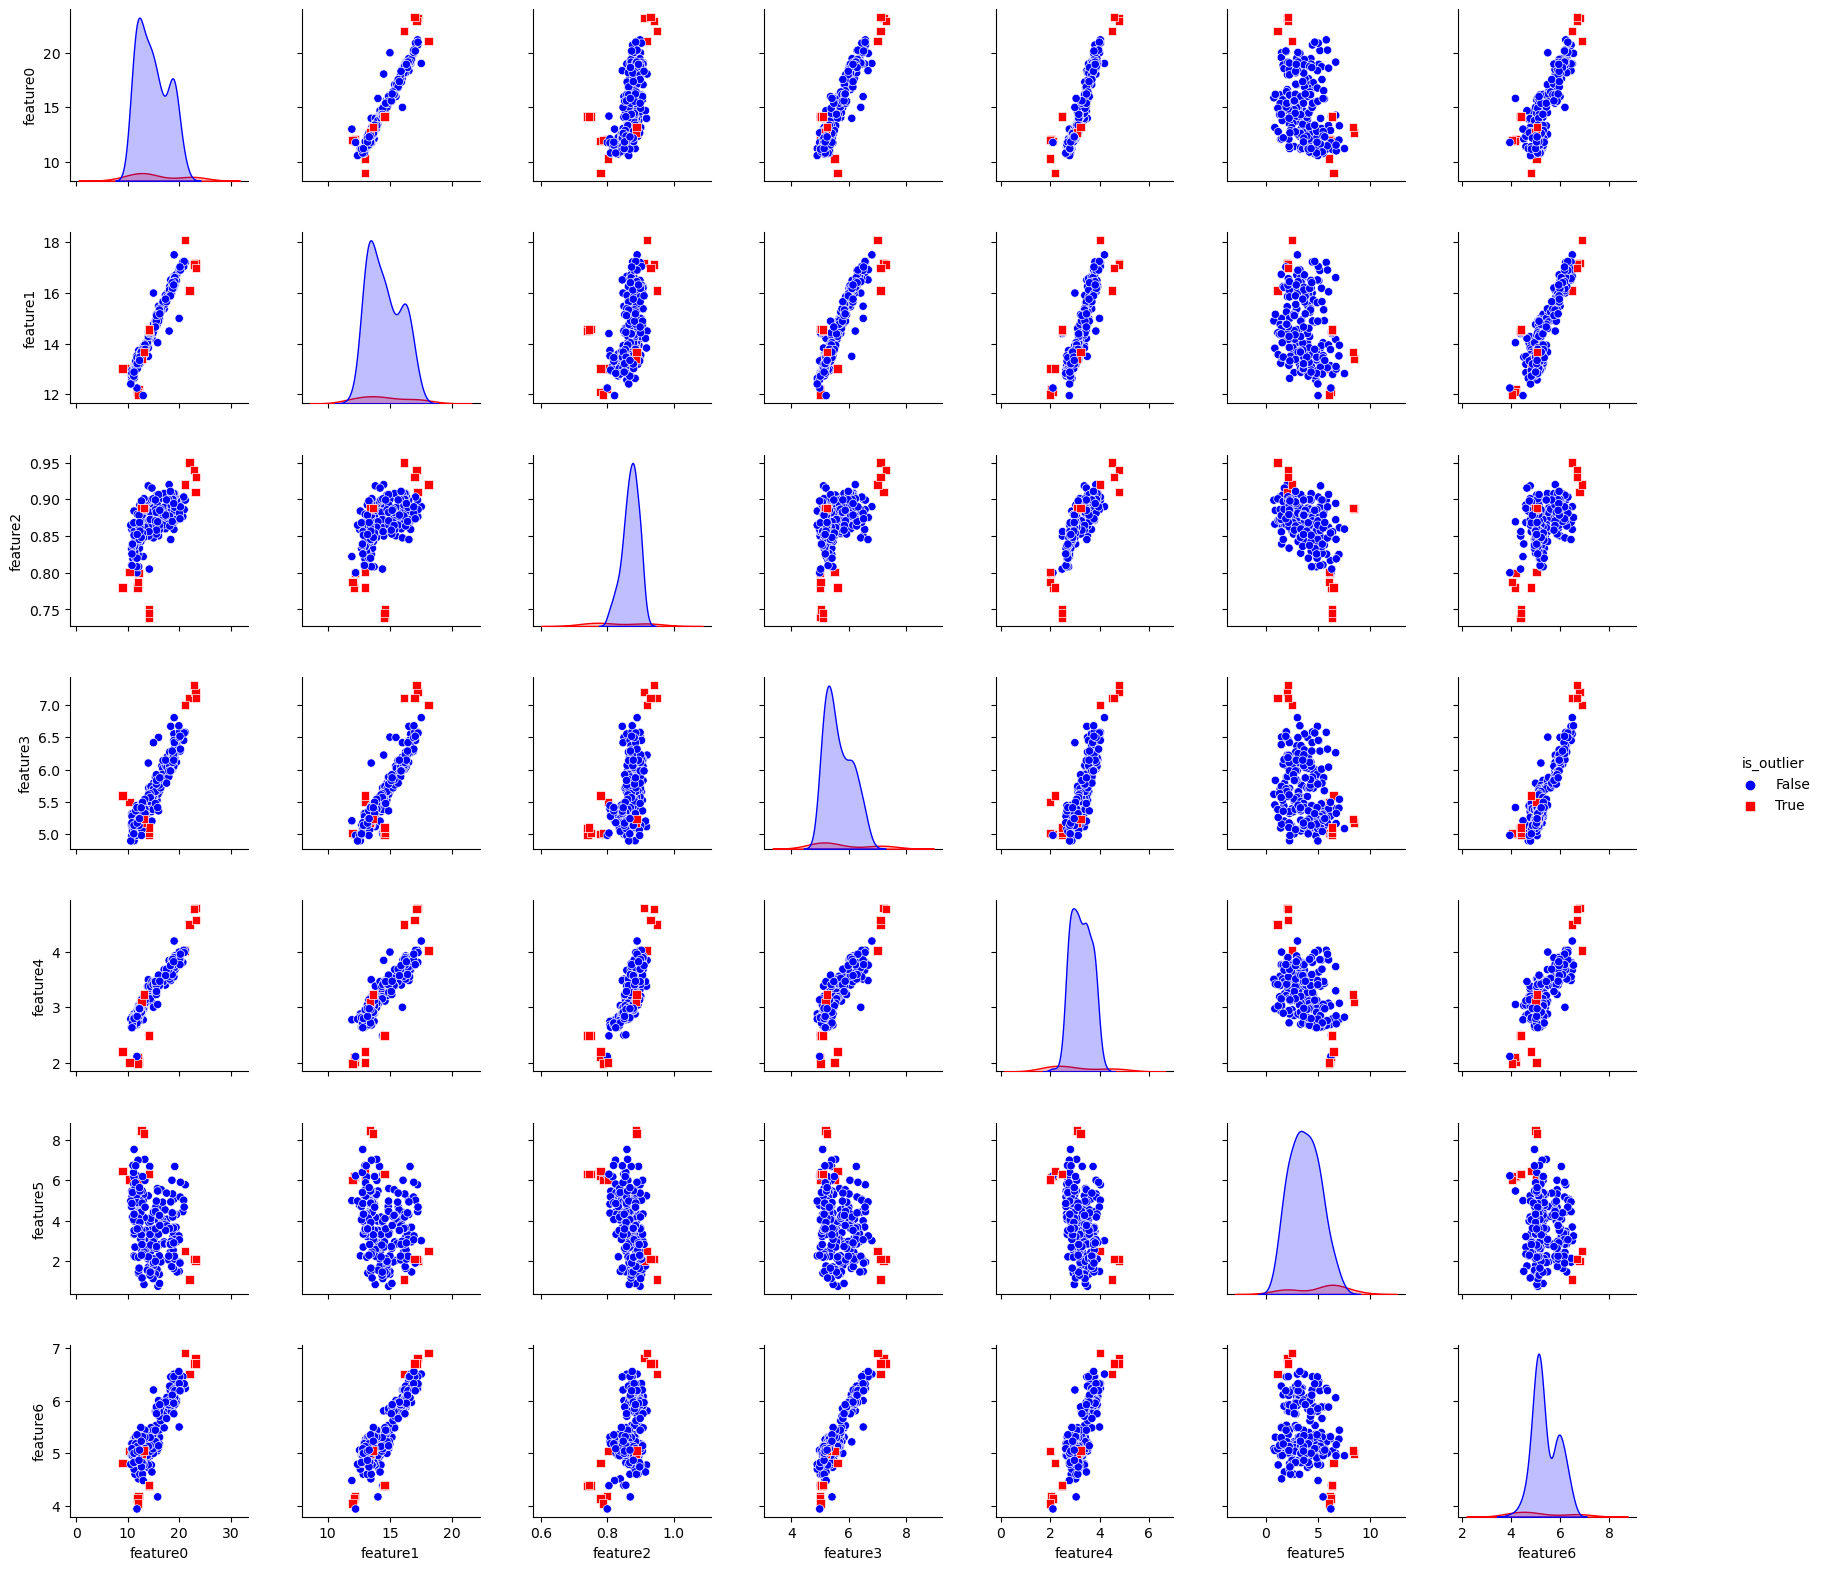

Outlier Counts for Each Class threshold is : 2.5
  Outlier Count
0             4
1             4
2             8


In [12]:
outlier_3 = detect_outliers(data, 2.5)

### 8.

The Interquartile Range (IQR) Method:

Calculate the 1st quartile (Q1) and 3rd quartile (Q3) of the data set
IQR = Q3 - Q1
Define lower and upper bounds:
Lower bound: Q1 - 1.5*IQR
Upper bound: Q3 + 1.5*IQR
Any data points below the lower bound or above the upper bound are considered outliers.
The key steps are:

Calculate Q1 and Q3
Compute IQR by subtracting Q1 from Q3
Set lower and upper bounds based on the IQR
Label points outside bounds as outliers
The IQR method is more robust to outliers compared to using standard deviation in the z-score method. It gives a sense of the spread of the middle 50% of the data rather than being influenced by extreme values. This makes it better for detecting outliers in skewed distributions.

Boxplot Method - Plot boxplot for the data and points outside 1.5 times the interquartile range are potential outliers.

Grubb's Test - Calculate the z-score for each data point and compare to a threshold. Points with a z-score higher than the threshold are deemed outliers
.
Tukey's Method - Calculate the Interquartile Range (IQR) and consider points below Q1 - 1.5IQR or above Q3 + 1.5IQR as outlier
s.
Deviations from Mean - Calculate mean and standard deviation. Points outside a threshold number of standard deviations from the mean are flagged as outlie
rs.
Mahalanobis Distance - Measures distance of point from center of data distribution. Outliers have a large Mahalanobis distance. Effective for multivariate d
ata.
Local Outlier Factor (LOF) - Unsupervised ML algorithm that assigns each data point a score based on local density. Points with high scores are outl
iers.
Isolation Forest - Unsupervised ML algorithm that isolates anomalies. Effectively detects global and local outliers.

Some methods are more sensitive than others. For example, z-score-based methods assume a normal distribution, while others, like the IQR (Interquartile Range), are more robust.

##### Simplicity and Ease of Use:  Z-score and IQR are simpler and easier to implement than methods like DBSCAN or Isolation Forest.
##### Suitability for Data Type: Z-score is best for normally distributed data, whereas IQR and Box Plot are more robust for skewed distributions. DBSCAN and Isolation Forest are better for complex datasets with high dimensionality or clusters.
##### Performance with Large Data: Algorithms like Isolation Forest and DBSCAN are more scalable for larger datasets compared to traditional statistical methods.
##### Sensitivity to Parameters: DBSCAN and Isolation Forest may require careful tuning of parameters, unlike IQR or Z-score, which are more straightforward.
##### Handling Multivariate Data: Mahalanobis Distance is particularly effective for multivariate datasets, as it considers correlations between features.

### 9.

##### The function outlier_removal is designed to remove outliers from a dataset

In [13]:
def outlier_removal(data,outlier):
    data_no_outlier = data
    data_no_outlier['is_outlier'] = outlier
    data_no_outlier = data_no_outlier[~data_no_outlier['is_outlier'].eq(True)]
    data_no_outlier.reset_index(drop=True, inplace=True)

    data_no_outlier_copy = data_no_outlier.copy()

    data_no_outlier_copy.drop(columns='is_outlier',inplace=True)
    return data_no_outlier_copy

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='label'),data['label'], test_size=0.25, random_state=42)

In [15]:
data_no_outlier = outlier_removal(data,outlier_3)
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(data_no_outlier.drop(columns='label'),data_no_outlier['label'], test_size=0.25, random_state=42)

In [16]:
def normalize_features(X):
    mean_values = np.mean(X, axis=0)
    std_values = np.std(X, axis=0)
    normalized_X = (X - mean_values) / std_values
    return normalized_X, mean_values, std_values

In [17]:
X_train, mean_values, std_values = normalize_features(X_train)
X_test = (X_test - mean_values) / std_values

In [18]:
X_train_out, mean_values, std_values = normalize_features(X_train_out)
X_test_out = (X_test_out - mean_values) / std_values

In [19]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_instances = len(y_true)
    accuracy = correct_predictions / total_instances
    return accuracy

# 2.2

### 1. OvO and OvA implementation
OvO:

        Generally more suitable for algorithms that don't scale well with the number of classes.
        Can be more robust when dealing with imbalanced datasets.
OVA:
        
        Typically works well with most classification algorithms.
        Can be sensitive to class imbalance, especially when the number of instances varies significantly across classes.
        
         OvA is a common default choice for many multi-class classification problems due to its simplicity and efficiency,
         but OvO might be preferred in certain scenarios, particularly when dealing with small to moderate-sized datasets.

## ova

In a One-vs-All (OvA) or One-vs-Rest approach, a separate binary classifier is trained for each class to distinguish that class from all other classes.
For a problem with N classes, N different binary classifiers are trained.
During prediction, each classifier provides a decision (or a probability) about whether a given instance belongs to its class or not. The final prediction is the class whose classifier is most confident that the instance belongs to it.

In [20]:
ova_model = OvA(LogisticRegression)
ova_model.train(X_train, y_train)
y_pred_ova = ova_model.predict(X_test)

Converged after 12814 iterations.
Converged after 8632 iterations.


In [21]:
calculate_accuracy(y_test, y_pred_ova)

0.9137931034482759

In [22]:
ova_model_out = OvA(LogisticRegression)

ova_model_out.train(X_train_out, y_train_out)
y_pred_ova_out = ova_model.predict(X_test_out)

Converged after 10884 iterations.
Converged after 18195 iterations.


In [23]:
calculate_accuracy(y_test_out, y_pred_ova_out)

0.9629629629629629

## ovo

In an One-vs-One (OvO) approach, a binary classifier is trained for each pair of classes.
For a problem with N classes, N*(N-1)/2 classifiers are trained.
During prediction, each instance is classified by every classifier, and the class that wins the most duels (is chosen most often) is the predicted class.

In [24]:
ovo_model = OvO(LogisticRegression)
ovo_model.train(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)

Converged after 12629 iterations.
Converged after 9311 iterations.


In [25]:
calculate_accuracy(y_test, y_pred_ovo)

0.9827586206896551

In [26]:
ovo_model_out = OvO(LogisticRegression)
ovo_model_out.train(X_train_out, y_train_out)
y_pred_ovo_out = ovo_model_out.predict(X_test_out)

Converged after 8505 iterations.


In [27]:
calculate_accuracy(y_test_out, y_pred_ovo_out)

0.9629629629629629

Softmax Regression might need more iterations to converge because it learns the boundaries for all classes simultaneously and is influenced by the complexity and nature of all classes. It performs well with distinct, mutually exclusive classes but can struggle with overlapping or imbalanced classes.

OvO has potentially faster convergence for each classifier but can be impractical for datasets with many classes due to the quadratic increase in the number of classifiers needed.

OvA strikes a balance between scalability and complexity, being more practical than OvO for large numbers of classes but potentially suffering from imbalances in the binary classifications it performs.

## Softmax

In [28]:
softmax_model = SoftmaxRegression(num_classes=class_num, learning_rate=0.01, num_iterations=20000)

In [29]:
softmax_model.train(X_train, y_train)

train_predictions = softmax_model.predict(X_train)
train_accuracy = calculate_accuracy(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_predictions = softmax_model.predict(X_test)
test_accuracy = calculate_accuracy(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.93
Test Accuracy: 0.98


In [30]:
softmax_model_out = SoftmaxRegression(num_classes=class_num, learning_rate=0.01, num_iterations=20000)

In [31]:
softmax_model_out.train(X_train_out, y_train_out)

train_predictions = softmax_model_out.predict(X_train_out)
train_accuracy = calculate_accuracy(y_train_out, train_predictions)
print(f"Training Accuracy After Removal: {train_accuracy:.2f}")

test_predictions = softmax_model_out.predict(X_test_out)
test_accuracy = calculate_accuracy(y_test_out, test_predictions)
print(f"Test Accuracy After Removal: {test_accuracy:.2f}")

Training Accuracy After Removal: 0.93
Test Accuracy After Removal: 0.98


SoftmaxRegression might require more iterations compared to binary logistic regression, especially in situations with a large number of classes.

In [32]:
def plot_cost_history(type_classifier,cost_history):
    plt.figure(figsize=(10, 5))
    if type_classifier != "Softmax":
        for i in range(len(cost_history)):
            plt.plot(cost_history[i][0], label=f'{cost_history[i][1]}')
        plt.legend()
            
    else:
            plt.plot(cost_history)
        
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost Function:{type_classifier}")
    plt.show()

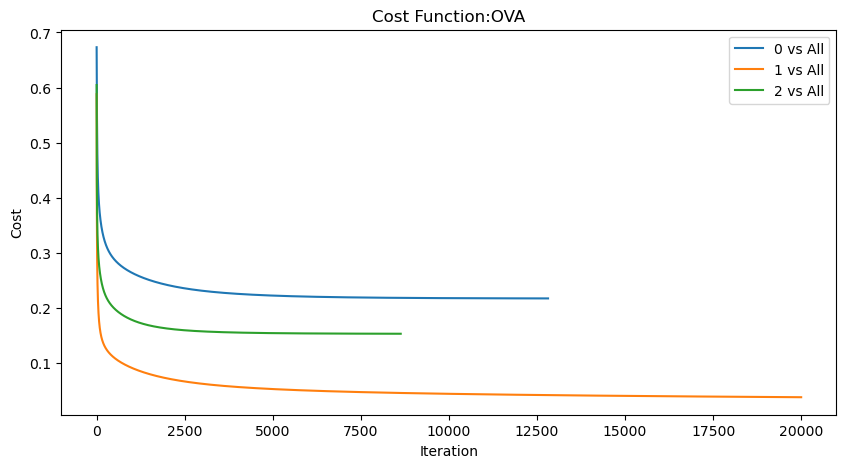

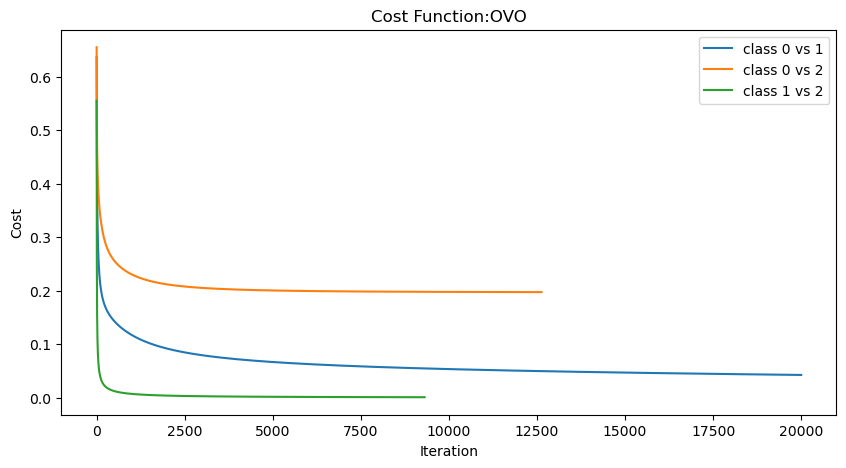

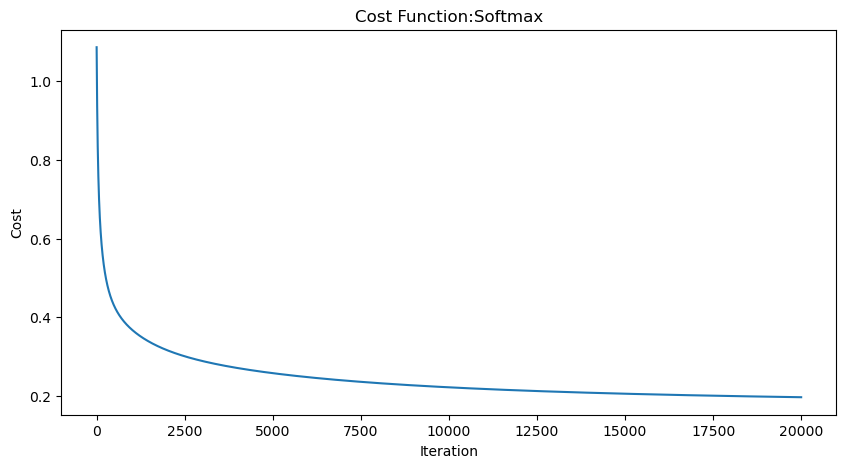

In [33]:
cost_history_ova = ova_model.cost_history
cost_history_ovo = ovo_model.cost_history
cost_history_softmax = softmax_model.cost_history

plot_cost_history("OVA",cost_history_ova)
plot_cost_history("OVO",cost_history_ovo)
plot_cost_history("Softmax",cost_history_softmax)

Softmax Regression:
When to Use:

Best suited for multinomial logistic problems where the classes are mutually exclusive. For example, classifying types of fruits.
Advantages:

Direct Multiclass Classification: Provides probabilities for each class directly, making it efficient for models where each instance clearly belongs to one class.
Scalability: Generally scales well with an increasing number of features.
Disadvantages:

Assumes Mutually Exclusive Classes: Not suitable for cases where an instance can belong to multiple classes simultaneously.
Linear Decision Boundary: Assumes a linear relationship between feature variables and the log-odds of the probabilities, which may not always hold true.
One-vs-One (OvO):
When to Use:

Useful when individual binary classifiers perform significantly better than multiclass classifiers. Often used in support vector machines (SVMs).
Advantages:

Reduced Complexity: Each classifier only needs to learn to distinguish between two classes, which can simplify the learning process.
Efficient for Small Datasets: Can perform better than OvA on smaller datasets.
Disadvantages:

Scalability: The number of classifiers grows quadratically with the number of classes, making it inefficient for datasets with a large number of classes.
Increased Computational Cost: Requires training multiple classifiers.
One-vs-All (OvA):
When to Use:

Suitable for situations where distinguishing between each class and all other classes is more feasible than distinguishing between every pair of classes.
Advantages:

Scalability: More scalable than OvO as it requires training only one classifier per class.
Simplicity: Each classifier only needs to distinguish between its class and all other classes combined, which can be simpler than distinguishing between every possible pair of classes.
Disadvantages:

Imbalanced Class Distribution: Can suffer from imbalanced class distribution in each binary classification problem.
Assumes Independence: Assumes the decision for each class is independent of the others, which might not be the case.